# Data visualization
We will focus on seaborn, a Python library that is built on top of matplotlib and has support for Numpy and Pandas

We will cover how to visually analyze
- Numerical variables with histograms
- Categorical variables with count plots
- Relationship between numerical variables with scatter plots, joint plots and pair plots
- Relationship between numerical and categorical variables with box plot and whisker plots and complex conditional plots

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
housing = pd.read_csv('data.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We will only be working with some of the variables — let’s filter and store their names in two lists called numerical and categorical, then redefine our housing DataFrame to contain only these variables:

In [31]:
numerical = [
  'SalePrice', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr'
]
categorical = [
  'MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold'
]

housing = housing[numerical + categorical]
housing.shape

(1460, 14)

## Analyze Numerical Variables

Let’s start with numerical variables, specifically our target variable, SalePrice.

Numerical variables are simply those for which the values are numbers. The first thing that we do when we have numerical variables is to understand what values the variable can take, as well as the distribution and dispersion. This can be achieved with a histogram:

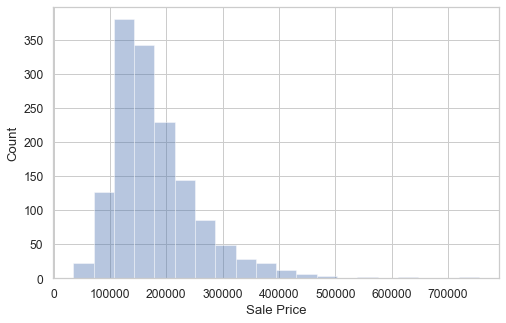

In [32]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.distplot(
    housing['SalePrice'], hist = True, kde = False, bins=20
).set(xlabel='Sale Price', ylabel='Count');

Taking a look at the histogram, we can see that very few houses are priced below 100,000, most of the houses sold between 100,000 and 200,000, and very few houses sold for above 400,000.

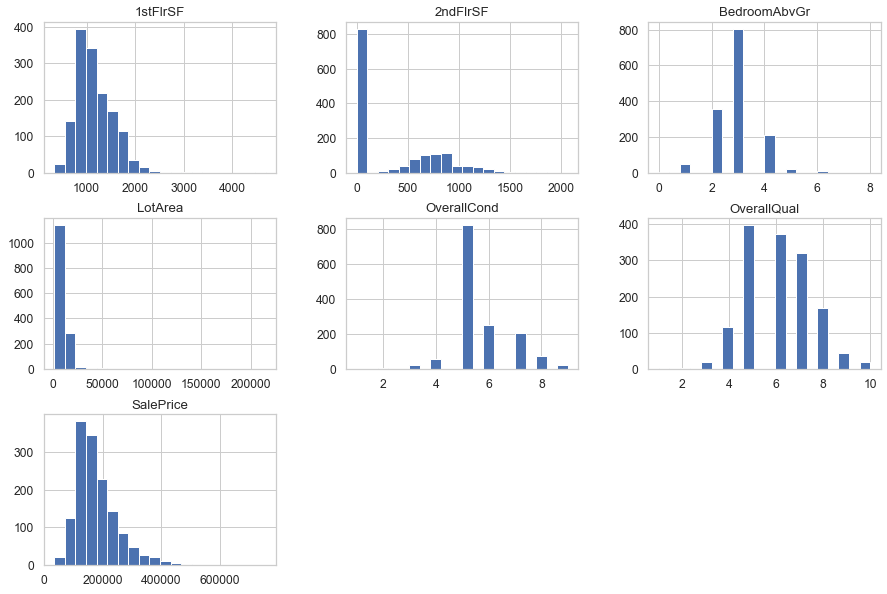

In [33]:
housing[numerical].hist(bins=20, figsize=(15, 10), layout=(3, 3));

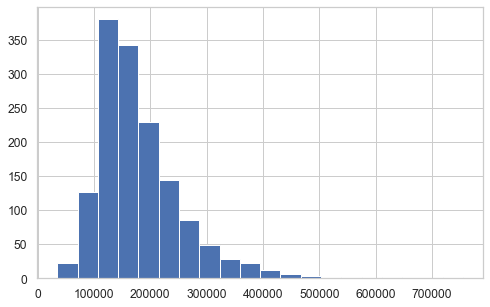

In [34]:
housing['SalePrice'].hist(bins=20)

## Analyze Categorical Variables

The values, distribution, and dispersion of categorical variables are best understood with bar plots. Let’s analyze the SaleCondition variable. seaborn gives us a very simple method to show the counts of observations in each category: the countplot.

In [35]:
housing['SaleCondition']

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1460, dtype: object

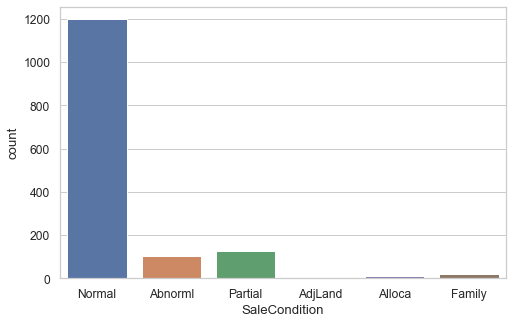

In [36]:
sns.countplot(housing['SaleCondition']);

From the visualization, we can easily see that most houses were sold in Normal condition, and very few were sold in AjdLand (adjoining land purchase), Alloca (allocation: two linked properties with separate deeds), and Family (sale between family members) conditions.

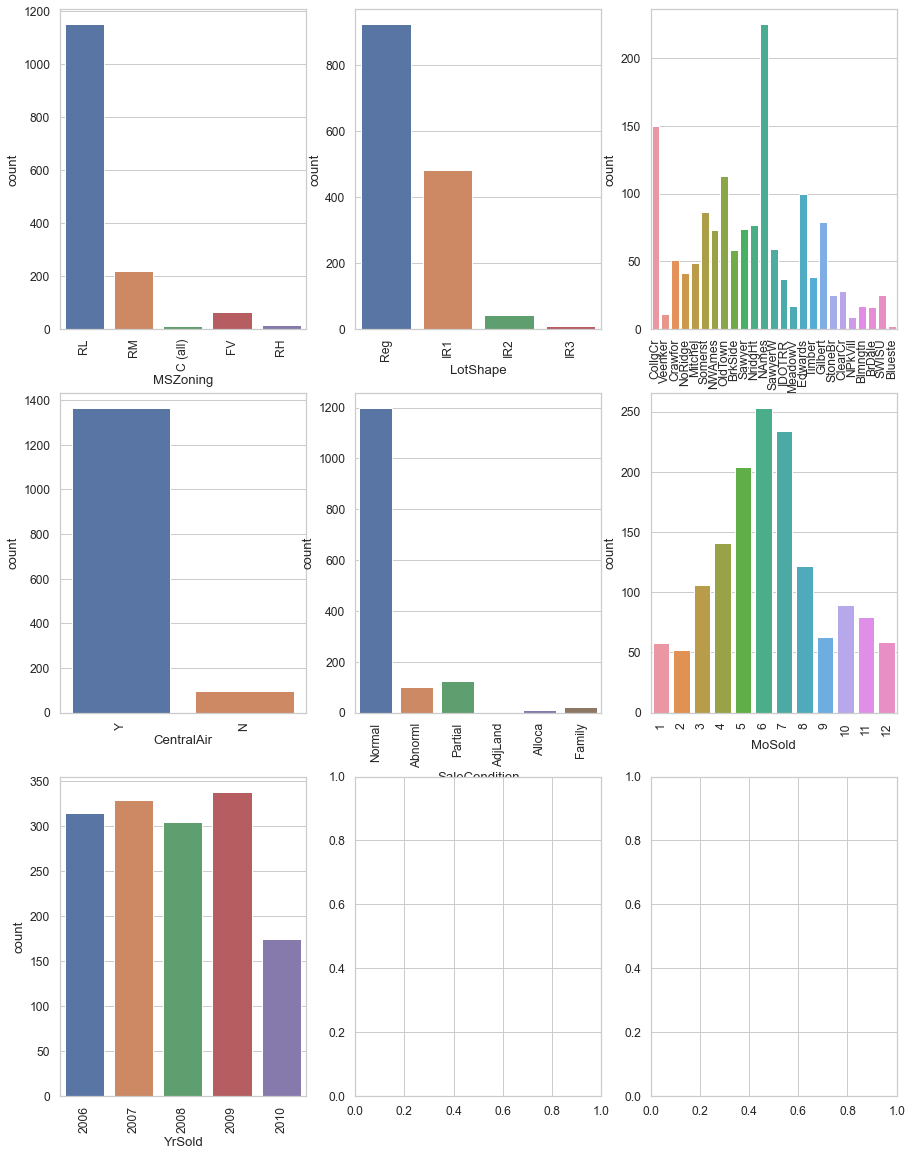

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Analyzing Relationships Between Numerical Variables

The scatter plot is often used for visualizing relationships between two numerical variables

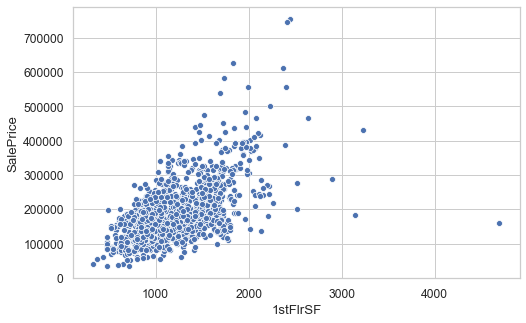

In [40]:
sns.scatterplot(x=housing['1stFlrSF'], y=housing['SalePrice']);

From the scatter plot, we see here that we have a positive relationship between the 1stFlrSF of the house and the SalePrice of the house. In other words, the larger the first floor of a house, the higher the likely sale price.

seaborn also provides us with a nice function called jointplot which will give you a scatter plot showing the relationship between two variables along with histograms of each variable in the margins — also known as a marginal plot.

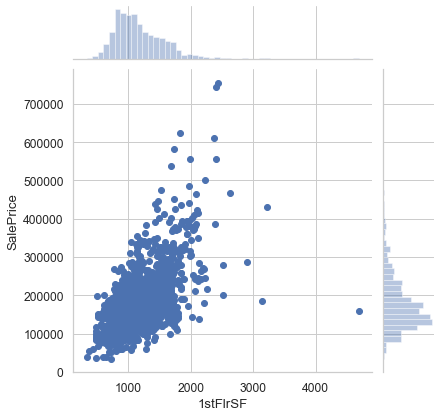

In [41]:
sns.jointplot(x=housing['1stFlrSF'], y=housing['SalePrice']);

Not only can you see the relationships between the two variables, but also how they are distributed individually.

## Analyzing Relationships Between Numerical and Categorical Variables

The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables,

In [44]:
categorical
# sns.boxplot(x=var, y='SalePrice', data=housing)

['MSZoning',
 'LotShape',
 'Neighborhood',
 'CentralAir',
 'SaleCondition',
 'MoSold',
 'YrSold']

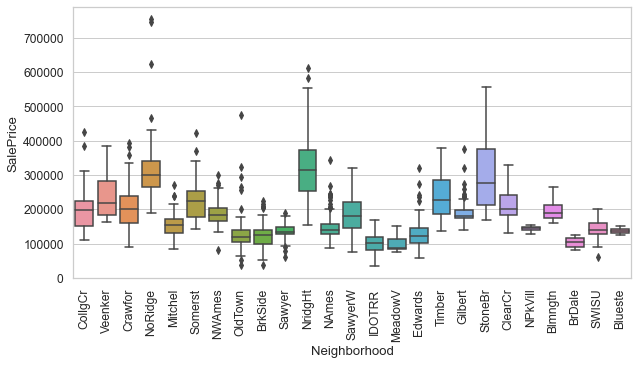

In [54]:
plt.figure(figsize=(10,5))

chart = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

plt.show()

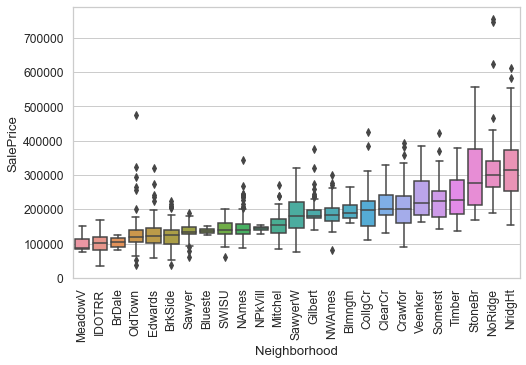

In [57]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
# chart = sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))
chart = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing, order = list(sorted_nb.index))
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()